# measure Absolute Fractional Flux Error 

$$|\delta F| = \frac{\int\limits_{\lambda_1}^{\lambda_2}|\frac{F_{\rm pred}(\lambda) - F_{\rm true}(\lambda)}{F_{\rm true}(\lambda)}| {\rm d}\lambda}{\int\limits_{\lambda_1}^{\lambda_2} {\rm d}\lambda}$$

In [1]:
import os
import pickle
import numpy as np

from spenderq import load_model
from spenderq import util as U
from spenderq import lyalpha as LyA

In [2]:
# --- plotting --- 
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import gridspec
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

%matplotlib inline

In [3]:
niter = 3
#models, losses = load_model('/tigress/chhahn/spender_qso/models/qso.london.z_2p1_3p5.rebin.iter%i.pt' % niter)
models, losses = load_model('/tigress/chhahn/spender_qso/models/london.lfsc.rsnr.sa1p1sb0p8.i%i.pt' % niter)

specs, recon, true_cont = [], [], []
redshifts, weights, tids, norms, latents = [], [], [], [], []
for ibatch in range(50): 
    # load batch
    with open('/tigress/chhahn/spender_qso/train/DESIlondon_highz.rebin.iter%i_%i.pkl' % (niter, ibatch), "rb") as f:
        spec, w, z, target_id, norm, zerr = pickle.load(f)
    specs.append(np.array(spec))
    tids.append(np.array(target_id))
    norms.append(np.array(norm))
    redshifts.append(np.array(z))
    weights.append(np.array(w))
    
    # latents
    #latents.append(np.load('/tigress/chhahn/spender_qso/train/DESIlondon_highz.rebin.iter%i_%i.latents.npy' % (niter, ibatch)))
    #latents.append(np.load('/tigress/chhahn/spender_qso/train/london.rebin.iter%i.simconloss_%i.latents.npy' % (niter, ibatch)))
    latents.append(np.load('/tigress/chhahn/spender_qso/train/london.lfsc.rsnr.sa1p1sb0p8.i%i_%i.latents.npy' % (niter, ibatch)))

    # load SpenderQ recon 
    #recon.append(np.load('/tigress/chhahn/spender_qso/train/DESIlondon_highz.rebin.iter%i_%i.recons.npy' % (niter, ibatch)))
    #recon.append(np.load('/tigress/chhahn/spender_qso/train/london.rebin.iter%i.simconloss_%i.recons.npy' % (niter, ibatch)))
    recon.append(np.load('/tigress/chhahn/spender_qso/train/london.lfsc.rsnr.sa1p1sb0p8.i%i_%i.recons.npy' % (niter, ibatch)))

    # load true continuum
    true_cont.append(np.load('/tigress/chhahn/spender_qso/train/DESIlondon_highz_%i.true_cont.npy' % (ibatch)))
    
specs = np.concatenate(specs, axis=0)
tids = np.concatenate(tids)
norms = np.concatenate(norms)
redshifts = np.concatenate(redshifts)
weights = np.concatenate(weights, axis=0)
latents = np.concatenate(latents)

recon = np.concatenate(recon, axis=0)
true_cont = np.concatenate(true_cont, axis=0)

w_recon = np.load('/tigress/chhahn/spender_qso/train/DESIlondon_highz.rebin.iter%i.wave_recon.npy' % niter)

/home/chhahn/projects/SpenderQ/src/spenderq/__init__.py:41: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_struct = torch.load(filename, map_location=device)
/tmp/ipyke

In [8]:
snr = weights**0.5 * specs
median_snr = np.median(snr, axis=1) * norms

In [4]:
wave_rest_rebin = np.linspace(800, 3000, 2000)

In [5]:
dw = wave_rest_rebin[1] - wave_rest_rebin[0]

In [6]:
picca_lya = U.london_picca('LyA')
barF_rest = np.load('barF_nobaldla.npy')

In [11]:
has_picca = np.zeros(len(redshifts))
for igal in range(len(redshifts)): 
    fpicca = picca_lya.get_continuum(int(tids[igal]))
    if fpicca is not None: has_picca[igal] = True

negative slope
negative slope
negative slope
negative slope
no fit
negative slope
no fit
no fit
no fit
negative slope
negative slope
negative slope
negative slope
no fit
no fit
negative slope
no fit
no fit
no fit
negative slope
negative slope
no fit
negative slope
negative slope
no fit
no fit
no fit
no fit
no fit
negative slope
no fit
negative slope
negative slope
no fit
negative slope
no fit
negative slope
no fit
no fit
no fit
negative slope
no fit
no fit
negative slope
no fit
negative slope
no fit
no fit
negative slope
no fit
no fit
negative slope
negative slope
no fit
no fit
no fit
no fit
no fit
negative slope
no fit
negative slope
negative slope
no fit
no fit
no fit
no fit
no fit
negative slope
no fit
negative slope
negative slope
no fit
no fit
no fit
no fit
negative slope
no fit
negative slope
negative slope
no fit
negative slope
negative slope
no fit
no fit
negative slope
no fit
no fit
no fit
negative slope
negative slope
no fit
no fit
no fit
negative slope
no fit
negative slope


In [12]:
np.save('affe_has_picca.npy', has_picca)

In [7]:
'''
# fractional residual over 1040 - 1200A
affe_spenderq, affe_picca = [], [] 
has_picca = np.zeros(len(redshifts))

for igal in range(len(redshifts)): 
    fpicca = picca_lya.get_continuum(int(tids[igal]))
    if fpicca is not None: 
        has_picca[igal] = True
        wlim = (wave_rest_rebin > np.max([1040, 3.6e3/float(1+redshifts[igal])])) & (wave_rest_rebin < 1195)
    
        # rebin true continuum
        true_rebin = U.trapz_rebin(
            np.linspace(3.50e3, 1e4, 3251)/float(1 + redshifts[igal]), 
            np.array(true_cont[igal]/norms[igal]), 
            xnew=wave_rest_rebin[wlim])
        
        # rebin reconstruction
        recon_rebin = U.trapz_rebin(
            w_recon, 
            recon[igal], 
            xnew=wave_rest_rebin[wlim])
        
        # fractional residual
        _affe_sq = (dw * np.sum(np.abs((true_rebin - recon_rebin)/true_rebin))) / (wave_rest_rebin[wlim][-1] - wave_rest_rebin[wlim][0])
        affe_spenderq.append(_affe_sq)

        # rebin picca
        fpicca /= np.array(norms[igal])
        picca_rebin = U.trapz_rebin(
            picca_lya.wave_picca, 
            fpicca, 
            xnew=wave_rest_rebin[wlim])

        _affe_picca = (dw * np.sum(np.abs((barF_rest[wlim] * true_rebin - picca_rebin)/(barF_rest[wlim] * true_rebin)))) / (wave_rest_rebin[wlim][-1] - wave_rest_rebin[wlim][0])
        affe_picca.append(_affe_picca)
        #print(_affe_sq, _affe_picca)
    else: 
        pass
    
affe_spenderq = np.array(affe_spenderq)
affe_picca = np.array(affe_picca)

np.save('affe_spenderq.npy', affe_spenderq)
np.save('affe_picca.npy', affe_picca)
np.save('affe_has_picca.npy', has_picca)
'''

negative slope
negative slope
negative slope
negative slope
no fit
negative slope
no fit
no fit
no fit
negative slope
negative slope
negative slope
negative slope
no fit
no fit
negative slope
no fit
no fit
no fit
negative slope
negative slope
no fit
negative slope
negative slope
no fit
no fit
no fit
no fit
no fit
negative slope
no fit
negative slope
negative slope
no fit
negative slope
no fit
negative slope
no fit
no fit
no fit
negative slope
no fit
no fit
negative slope
no fit
negative slope
no fit
no fit
negative slope
no fit
no fit
negative slope
negative slope
no fit
no fit
no fit
no fit
no fit
negative slope
no fit
negative slope
negative slope
no fit
no fit
no fit
no fit
no fit
negative slope
no fit
negative slope
negative slope
no fit
no fit
no fit
no fit
negative slope
no fit
negative slope
negative slope
no fit
negative slope
negative slope
no fit
no fit
negative slope
no fit
no fit
no fit
negative slope
negative slope
no fit
no fit
no fit
negative slope
no fit
negative slope


In [ ]:
affe_spenderq = np.load('affe_spenderq.npy')
affe_picca = np.load('affe_picca.npy')
has_picca = np.load('affe_has_picca.npy')

In [26]:
np.mean(median_snr[has_picca.astype(bool)] < 1)

np.float64(0.5012577595650586)

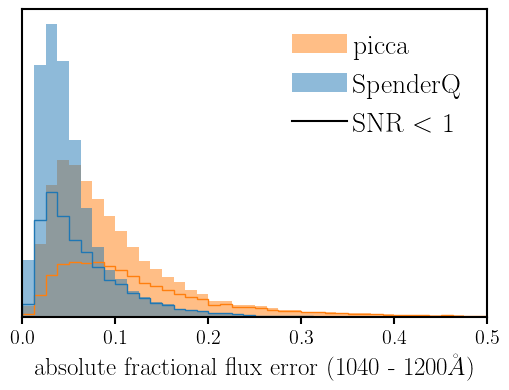

In [25]:
fig = plt.figure(figsize=(6,4))
sub = fig.add_subplot(111)
_ = sub.hist(affe_picca, bins=40, range=(0., 0.5), alpha=0.5, color='C1', label='picca')
_ = sub.hist(affe_picca[median_snr[has_picca.astype(bool)] < 1], bins=40, range=(0., 0.5), color='C1', histtype='step')
#_ = sub.hist(affe_picca[median_snr[has_picca.astype(bool)] >= 1], bins=40, range=(0., 0.5), color='C1', linestyle='-.', histtype='step')

_ = sub.hist(affe_spenderq, bins=40, range=(0., 0.5), alpha=0.5, color='C0', label='SpenderQ')
_ = sub.hist(affe_spenderq[median_snr[has_picca.astype(bool)] < 1], bins=40, range=(0., 0.5), color='C0', histtype='step')
#_ = sub.hist(affe_spenderq[median_snr[has_picca.astype(bool)] >= 1], bins=40, range=(0., 0.5), color='C0', linestyle='-.', histtype='step')

sub.plot([], [], c='k', label='SNR $<$ 1')
sub.legend(loc='upper right', fontsize=20, handletextpad=0.2)
sub.set_xlabel(r'absolute fractional flux error (1040 - 1200$\AA$)', fontsize=18)
sub.set_xlim(0., 0.5)
sub.set_yticks([])
fig.savefig('affe.pdf', bbox_inches='tight')

(0.0, 1.0)

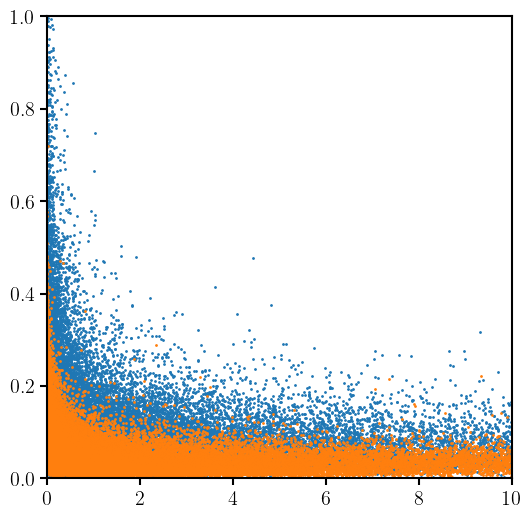

In [18]:
fig = plt.figure(figsize=(6,6))
sub = fig.add_subplot(111)
sub.scatter(median_snr[has_picca.astype(bool)], affe_picca, s=1)
sub.scatter(median_snr[has_picca.astype(bool)], affe_spenderq, s=1)
sub.set_xlim(0., 10)
sub.set_ylim(0., 1.)

In [35]:
np.mean(affe_picca > 0.2), np.mean(affe_spenderq > 0.2)

(np.float64(0.10518521523917718), np.float64(0.014322229885990181))

In [33]:
np.mean(affe_picca > 0.1), np.mean(affe_spenderq > 0.1)

(np.float64(0.3772467237391975), np.float64(0.1084716192640078))

In [29]:
np.mean(affe_picca), np.mean(affe_spenderq)

(np.float64(0.10705943109986614), np.float64(0.05368923184596531))

In [30]:
np.median(affe_picca), np.median(affe_spenderq)

(np.float64(0.07968199857517243), np.float64(0.042233353772278076))

# save fig data 